<a href="https://colab.research.google.com/github/ForestTiger-GH/COTRA/blob/main/COTRnA_v_1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Нейронная сеть для обработки **предварительно подготовленных** данных

Тестовая выборка зациклена

# Импорт библиотек

In [91]:
import numpy as np                                                                # Для операция с массивами и векторами
import sys                                                                        # Для печати на экран
import pylab                                                                      # Для построения графиков

# Ввод параметров

In [92]:
name1 = ("COT Reports Neural Analysis")                                           # Описание статистики из базы СОТ
name2 = ("Wheat Futures")
name3 = ("Рандомные данные")
comment1 = ("Тест")
name4 = ("Случайно")
dateEdu = ("--")
dateTest = ("--")

enter_neurons = int(6)                                                           # Количество переменных. И количество входных значений к каждому нейрону скрытого слоя.

hidden_neurons = int(2)                                                          # Количество нейронов скрытого слоя. И количество входных значений к выходному слою.

exit_neurons = int(1)                                                             # Количество выходных нейронов (НЕ МЕНЯТЬ)

epochs = int(1000)                                                                 # Количество эпох для обучения

learning_rate = 0.03                                                              # Скорость обучения (схождения сети)

# Функции

**Объект class**

init - конструктор

sigmoid - сигмоидная функция активации

predict - метод прямого распространения, то есть прямой ход функции

train - обратное распространение, коррекция весов

In [93]:
class PartyNN(object):

    def __init__(self, learning_rate=0.1):

        self.weights_0_1 = np.random.normal(0.0, 2 ** -0.5, (hidden_neurons, enter_neurons))     # Веса от входного слоя к первому скрытому; изначально - случайные

        self.weights_1_2 = np.random.normal(0.0, 1, (exit_neurons, hidden_neurons))              # Веса от первого скрытого слоя к выходному; изначально - случайные

        self.sigmoid_mapper = np.vectorize(self.sigmoid)                         # Векторизация функции активации - сигмоиды
        self.learning_rate = np.array([learning_rate])                           # Преобразование коэф. скорости обучения в массив

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))                                              # Функция активация - сигмоида

    def predict(self, inputs):                                                   # PREDICT используется для Прямого хода - функция просто выдает конечный результат, без корректировки весов
                                                                                 # Обработка на скрытом слое:
        inputs_1 = np.dot(self.weights_0_1, inputs)                                 # Умножение входных данных на веса скрытого слоя
        outputs_1 = self.sigmoid_mapper(inputs_1)                                   # Преобразование полученных чисел по функции сигмоиды
                                                                                 # Обработка на выходном слое:
        inputs_2 = np.dot(self.weights_1_2, outputs_1)                              # Умножение данных со скрытого слоя на веса выходного слоя
        outputs_2 = self.sigmoid_mapper(inputs_2)                                   # Преобразование полученных чисел по функции сигмоиды
        return outputs_2                                                            # Вывод итогового значения 

    def train(self, inputs, expected_predict):                                   # TRAIN включает также Обратный ход и обучает сеть - вторая половина функции корректирует веса
        inputs_1 = np.dot(self.weights_0_1, inputs)                              # Эта часть функции как в Предикте
        outputs_1 = self.sigmoid_mapper(inputs_1)

        inputs_2 = np.dot(self.weights_1_2, outputs_1)
        outputs_2 = self.sigmoid_mapper(inputs_2)
        actual_predict = outputs_2[0]                                            # Вывод итогового значения и прикрепление его к переменной

        error_layer_2 = np.array([actual_predict - expected_predict])            # Расчет ошибки ВЫХОДНОГО слоя - сравнение расчетных итогов и реальных 
        gradient_layer_2 = actual_predict * (1 - actual_predict)                 # Преобразование итоговых значений по формуле дифференциала 
        weights_delta_layer_2 = error_layer_2 * gradient_layer_2                 # Расчет дельты выходного слоя - перемножение ошибки и дифференцированных итоговых значений

                                                                                 # Далее КОРРЕКТИРОВКА весов ВЫХОДНОГО слоя
        self.weights_1_2 -= (np.dot(weights_delta_layer_2, outputs_1.reshape(1, len(outputs_1)))) * self.learning_rate  # Перемножение старых входных данных со скрытого слоя на дельту и на скорость обучения

        error_layer_1 = weights_delta_layer_2 * self.weights_1_2                 # Расчет ошибки СКРЫТОГО слоя - перемножение НОВЫХ весов выходного слоя на дельту
        gradient_layer_1 = outputs_1 * (1-outputs_1)                             # Преобразование по формуле дифференциала
        weights_delta_layer_1 = error_layer_1 *gradient_layer_1                  # Расчет дельты скрытого слоя
                                                                                 # Далее КОРРЕКТИРОВКА весов СКРЫТОГО слоя
        self.weights_0_1 -= np.dot(inputs.reshape(len(inputs), 1), weights_delta_layer_1).T * self.learning_rate         # Перемножение ВХОДНЫХ данных на дельту скрытого слоя и на скорость обучения


In [94]:
def MSE (y, Y):                                                                   # Функция ошибки - среднеквадратичное отклонение (Minimum Square Error)
    return np.mean((y-Y)**2)

# Обучающая выборка

In [95]:
train = [
([0, 0, 0, 0, 0, 1], 0),
([1, 0, 0, 0, 0, 1], 0),
([1, 0, 1, 1, 1, 0], 0),
([1, 0, 1, 1, 1, 1], 1),
([1, 0, 1, 1, 0, 0], 1),
([1, 1, 1, 1, 1, 1], 0),
([0, 1, 0, 0, 0, 1], 0),
([0, 0, 0, 1, 1, 1], 1),
([1, 0, 0, 1, 1, 1], 1),
([1, 1, 0, 0, 0, 0], 0),
]

# Тестовая выборка

In [96]:
testing = [
([0, 0, 0, 1, 1, 0], 0),
([1, 1, 1, 1, 1, 1], 1),
([1, 0, 1, 0, 1, 0], 1),
([1, 0, 1, 1, 0, 1], 1),
([0, 0, 0, 0, 0, 0], 0),
]

# Обучение сети

In [97]:
education_error_count = []
testing_error_count = []
education_result_count = []
testing_result_count = []

aaaa = []

network = PartyNN(learning_rate=learning_rate)

for e in range(epochs):
    inputs_ = []
    correct_predictions = []
    for input_stat, correct_predict in train:
        network.train(np.array(input_stat), correct_predict)
        inputs_.append(np.array(input_stat))
        correct_predictions.append(np.array(correct_predict))

    train_loss = MSE(network.predict(np.array(inputs_).T), np.array(correct_predictions))
    education_error_count.append(train_loss)                                               # Сохранение значения ошибки (на обучающей выборке) на каждом цикле

    llll = np.array(correct_predictions)                                              # Фиктивная переменная для ускорения работы сети в цикле ниже
    mmmm = network.predict(np.array(inputs_).T)                                       # Фиктивная переменная для ускорения работы сети в цикле ниже

    for i in range(len(llll)):                                                   # Цикл для сохранения значения качества (на обучающей выборке) на каждом цикле
        if llll[i] != np.around(mmmm[0]).astype(int)[i]:
            aaaa.append(1)                                                            # Дополнительная переменная
        else:
            aaaa.append(0)

    bbbb = 1-sum(aaaa)/len(np.around(mmmm[0]).astype(int))                            # Дополнительная переменная
    education_result_count.append(bbbb)                                                    # Сохранение значения ошибки (на обучающей выборке) на каждом цикле
    aaaa =[]                                                                     # Сброс дополнительной переменной


    ddd = []
    fff =[]
    ggg = []
    hhh = []
    for input_stat, correct_predict in testing:                                       # Цикл по тестовой выборке
        if network.predict(np.array(input_stat))>.5:                                  # Расчет Прогнозных значений по функции Предикта. Далее оценивается - полученное значение больше или меньше 0,5
            ddd.append(1)                                                                   # Если больше - создается список и в него вносит результат как TRUE (по сути это как округление - можно упростить)
        else:
            ddd.append(0)                                                                   # Если меньше - как False 

        if correct_predict == 1:                                                      # В аналогичный список на каждом цикле сводятся Реальные итоговое значения
            fff.append(1)
        else:
            fff.append(0)

    for j in range(len(fff)):                                                         # Цикл для сравнения двух полученных списков - прогнозных и реальных значений
        if ddd[j] != fff[j]:
            ggg.append(1)                                                             # Если значения отличаются - в новый список подается Единица
        else:
            ggg.append(0)                                                             # Если ошибок нет - Ноль

    hhh = 1-sum(ggg)/len(fff)                                                         # Расчет итога - сумма полученных Единиц делится на размер списка
    testing_result_count.append(hhh)
    testing_loss = MSE(network.predict(np.array(inputs_).T), np.array(correct_predict))
    testing_error_count.append(testing_loss)

    sys.stdout.write("\rProgress: {}    |    Education loss: {}        Testing Loss: {}        Education Result: {}        Testing Result: {}".format(
        str(100*e/float(epochs))[:4], 
        str(train_loss)[:6],
        str(testing_loss)[:6],
        str(bbbb*100) [:5],
        str(hhh*100)[:5]
        ))

testing_result = hhh*100                                                          # Сохранение результатов
testing_sample_size = len(testing)

education_progress = 100*e/float(epochs)                                         # Сохранение итоговых результатов
education_loss = train_loss
education_result = bbbb*100
education_sample_size = len(np.array(correct_predictions))

Progress: 99.9    |    Education loss: 0.1169        Testing Loss: 0.2678        Education Result: 90.0        Testing Result: 19.99

# Вывод итоговых значений по обучающей выборке

**Вывод результатов True/False** (округленных коэффициентов выходного нейрона)

In [98]:
for input_stat, correct_predict in train:
    print("For input: {} the prediction is: {}, expected: {}".format(
        str(input_stat),
        str(network.predict(np.array(input_stat)) > .5),
        str(correct_predict == 1)))

For input: [0, 0, 0, 0, 0, 1] the prediction is: [False], expected: False
For input: [1, 0, 0, 0, 0, 1] the prediction is: [False], expected: False
For input: [1, 0, 1, 1, 1, 0] the prediction is: [ True], expected: False
For input: [1, 0, 1, 1, 1, 1] the prediction is: [ True], expected: True
For input: [1, 0, 1, 1, 0, 0] the prediction is: [ True], expected: True
For input: [1, 1, 1, 1, 1, 1] the prediction is: [False], expected: False
For input: [0, 1, 0, 0, 0, 1] the prediction is: [False], expected: False
For input: [0, 0, 0, 1, 1, 1] the prediction is: [ True], expected: True
For input: [1, 0, 0, 1, 1, 1] the prediction is: [ True], expected: True
For input: [1, 1, 0, 0, 0, 0] the prediction is: [False], expected: False


**Вывод неокругленных коэффициентов выходного нейрона**

In [99]:
for input_stat, correct_predict in train:
    print("For input: {} the prediction is: {}, expected: {}".format(
        str(input_stat),
        str(network.predict(np.array(input_stat))),
        str(correct_predict == 1)))

For input: [0, 0, 0, 0, 0, 1] the prediction is: [0.26796092], expected: False
For input: [1, 0, 0, 0, 0, 1] the prediction is: [0.20195854], expected: False
For input: [1, 0, 1, 1, 1, 0] the prediction is: [0.72565599], expected: False
For input: [1, 0, 1, 1, 1, 1] the prediction is: [0.59897066], expected: True
For input: [1, 0, 1, 1, 0, 0] the prediction is: [0.68345047], expected: True
For input: [1, 1, 1, 1, 1, 1] the prediction is: [0.29791999], expected: False
For input: [0, 1, 0, 0, 0, 1] the prediction is: [0.12489201], expected: False
For input: [0, 0, 0, 1, 1, 1] the prediction is: [0.76958928], expected: True
For input: [1, 0, 0, 1, 1, 1] the prediction is: [0.70253772], expected: True
For input: [1, 1, 0, 0, 0, 0] the prediction is: [0.15362616], expected: False


# Вывод полученных весов

In [100]:
print("Веса скрытого слоя:")
print()
print(network.weights_0_1)
print()
print("Веса выходного слоя:")
print()
print(network.weights_1_2)

Веса скрытого слоя:

[[-0.40718144 -2.10812249  0.54545547  1.32259962  1.67447261 -0.95823811]
 [ 0.36300655  0.78005507  1.07650617 -1.39364505  0.26992346  0.76282347]]

Веса выходного слоя:

[[ 2.52324984 -2.4994135 ]]


# Сводка параметров и результатов


            COT Reports Neural Analysis                Wheat Futures

ПАРАМЕТРЫ
-----------------------------------------------------------------------------
6 переменных    ->    2 нейронов скрытого слоя    ->    1 выходной нейрон

Рандомные данные                             Случайно
Тест
-----------------------------------------------------------------------------
Эпох для обучения:       1000
Скорость обучения:       0.03

Примеров для обучения:   10        --
Примеров для теста:      5        --
-----------------------------

РЕЗУЛЬТАТЫ
----------------------------------------
Прогресс обучения:               99.9 %
Квадрат ошибки:                   0.116

Качество на обучающей выборке:   90.0 %
Качество на тестовой выборке:    19.9 %
----------------------------------------



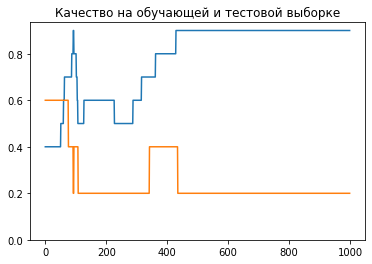

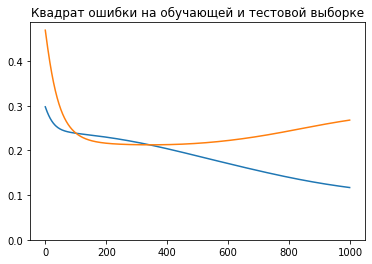

In [101]:
print()
print("            {}                {}".format(
    str(name1),
    str(name2)
    ))
print()
print("ПАРАМЕТРЫ")
print('-----------------------------------------------------------------------------')
print("{} переменных    ->    {} нейронов скрытого слоя    ->    {} выходной нейрон".format(
      str(enter_neurons),
      str(hidden_neurons),
      str(exit_neurons)
))
print()
print("{}                             {}".format(
    str(name3), 
    str(name4)
))
print(comment1)
print('-----------------------------------------------------------------------------')
print("Эпох для обучения:       {}".format(str(epochs)))
print("Скорость обучения:       {}".format(str(learning_rate)))
print()
print("Примеров для обучения:   {}        {}".format(
    str(education_sample_size),
    str(dateEdu)
))
print("Примеров для теста:      {}        {}".format(
    str(testing_sample_size),
    str(dateTest)
))
print('-----------------------------')
print()
print("РЕЗУЛЬТАТЫ")
print('----------------------------------------')
print("Прогресс обучения:               {} %".format(str(education_progress)[:5]))
print("Квадрат ошибки:                   {}".format(str(education_loss)[:5]))
print()
print("Качество на обучающей выборке:   {} %".format(str(education_result)[:4]))
print("Качество на тестовой выборке:    {} %".format(str(testing_result)[:4]))
print('----------------------------------------')
print()
pylab.plot(education_result_count)
pylab.plot(testing_result_count)
pylab.ylim(bottom=0)
pylab.title('Качество на обучающей и тестовой выборке')
pylab.show()
pylab.plot(education_error_count)
pylab.plot(testing_error_count)
pylab.ylim(bottom=0)
pylab.title('Квадрат ошибки на обучающей и тестовой выборке')
pylab.show()